In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
data=fetch_california_housing()

In [4]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [5]:
df["target"]=data.target

In [6]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [7]:
df=df.sample(frac=0.20)

In [9]:
X=df.drop("target",axis=1)
y=df.target

In [10]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7708,6.7744,44.0,5.770701,1.076433,822.0,2.617834,33.95,-118.14
19403,4.3864,18.0,5.507042,1.000000,247.0,3.478873,37.72,-120.93
5089,1.2230,30.0,4.020761,1.100346,1207.0,4.176471,33.98,-118.29
4767,3.0694,37.0,4.232877,1.058219,966.0,3.308219,34.03,-118.37
20344,3.0219,29.0,5.890940,1.060403,2591.0,4.347315,34.23,-119.06
...,...,...,...,...,...,...,...,...
13497,1.6993,28.0,4.721154,1.067308,1196.0,3.833333,34.15,-117.33
18544,1.6923,52.0,5.520548,0.986301,200.0,2.739726,36.97,-122.03
7124,5.3184,36.0,6.079787,1.026596,826.0,4.393617,33.90,-118.03
10305,6.6678,16.0,7.692308,1.017094,871.0,3.722222,33.88,-117.78


In [11]:
y

7708     2.941
19403    1.795
5089     1.000
4767     1.222
20344    2.217
         ...  
13497    0.678
18544    2.625
7124     1.711
10305    3.019
9291     1.792
Name: target, Length: 4128, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.20,random_state=1)

# DTREGRESSOR

In [15]:
from sklearn.tree import DecisionTreeRegressor

In [16]:
model=DecisionTreeRegressor()

In [17]:
model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [18]:
y_pred=model.predict(X_test)

In [20]:
from sklearn.metrics import r2_score
print(r2_score(y_pred,Y_test))

0.4658245211273071


# HYPERPARAMETRE TUNING

In [21]:
param={
    "criterion":["squared_error","friedman_mse","absolute_error","poisson"],
    "splitter":["best","random"],
    "max_depth":[1,2,3,4,5,6],
    'max_features':["auto","sqrt","log2"]

}

In [22]:
rgressor=DecisionTreeRegressor()

In [23]:
from sklearn.model_selection import GridSearchCV
model=GridSearchCV(rgressor,param_grid=param,cv=3,scoring="neg_mean_squared_error")

In [24]:
model.fit(X_train,Y_train)

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
144 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_paramet

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [25]:
y_pred=model.predict(X_test)

In [26]:
model.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [29]:
final_reg=DecisionTreeRegressor(criterion= 'squared_error',max_depth= 5,max_features= 'log2',splitter= 'best')

In [30]:
final_reg.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=5, max_features='log2')

In [31]:
y_pred=final_reg.predict(X_test)

In [32]:
from sklearn import tree

[Text(0.5, 0.9166666666666666, 'x[2] <= 6.299\nsquared_error = 1.316\nsamples = 3302\nvalue = 2.086'),
 Text(0.25, 0.75, 'x[0] <= 4.038\nsquared_error = 1.047\nsamples = 2646\nvalue = 1.901'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'x[5] <= 2.183\nsquared_error = 0.729\nsamples = 1885\nvalue = 1.589'),
 Text(0.0625, 0.4166666666666667, 'x[6] <= 37.825\nsquared_error = 1.338\nsamples = 300\nvalue = 2.296'),
 Text(0.03125, 0.25, 'x[7] <= -118.13\nsquared_error = 1.328\nsamples = 231\nvalue = 2.561'),
 Text(0.015625, 0.08333333333333333, 'squared_error = 1.19\nsamples = 160\nvalue = 2.851'),
 Text(0.046875, 0.08333333333333333, 'squared_error = 1.022\nsamples = 71\nvalue = 1.907'),
 Text(0.09375, 0.25, 'x[4] <= 405.5\nsquared_error = 0.351\nsamples = 69\nvalue = 1.409'),
 Text(0.078125, 0.08333333333333333, 'squared_error = 0.208\nsamples = 15\nvalue = 1.042'),
 Text(0.109375, 0.08333333333333333, 'squared_error = 0.343\nsamples = 54\nvalue = 1.511'),

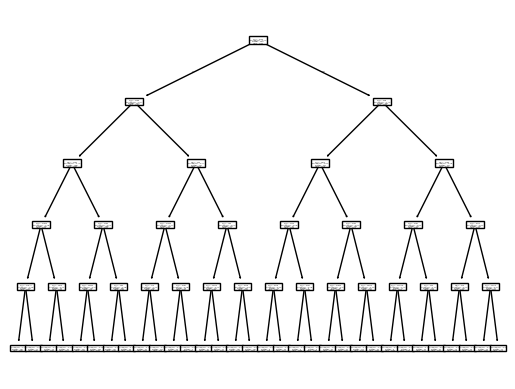

In [33]:
tree.plot_tree(final_reg)